# <div style="text-align: center">18.335/6.337 Final Project - The L-BFGS algorithm</div>
# <div style="text-align: center">Visualization</div>
### <div style="text-align: center">Created by Yusu Liu and Simon Batzner</div>

Reference: http://tiao.io/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/

In [45]:
%matplotlib inline

In [46]:
# %%bash
# pip install mycli

In [47]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'r'

In [48]:
# params 
fun = 'rosenbrock'

# load path
import h5py 
filename="path.jld"
file = h5py.File(filename, 'r')
data= file["pos"][()]
file.close()
path = data[:, 10:]
print(path.shape)

(2, 22)


In [49]:
if fun == 'rosenbrock': 
    # rosenbrock
    f = lambda x, y: (1-x)**2+100*(y-x**2)**2
    
elif fun == 'himmelblau': 
    # himmelblau
    f = lambda x, y: (x**2+y-11)**2+(x+xy**2-7)**2

elif fun == 'both': 
    # booth
    f = lambda x, y: (x+2*y-7)**2+(2*x+x-5)**2

elif fun == 'bohachesvky1': 
    # bohachevsky1
    f = lambda x, y: x**2+2*y**2-0.3*cos(3*pi*x)-0.4*cos(4*pi*y)+0.7

elif fun == 'easom': 
    # easom
    f = lambda x, y: -cos(x)*cos(y)*exp(-(x-pi)**2-(y-pi)**2)

In [50]:
xmin, xmax, xstep =  0, 2, .01
ymin, ymax, ystep = 0., 2.5, .01

In [51]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [52]:
z = f(x, y)

In [53]:
minima = np.array([1., 1.])

In [54]:
f(*minima)

0.0

In [55]:
minima_ = minima.reshape(-1, 1)
minima_

array([[ 1.],
       [ 1.]])

In [56]:
f(*minima_)

array([ 0.])

## 3D Surface Plot

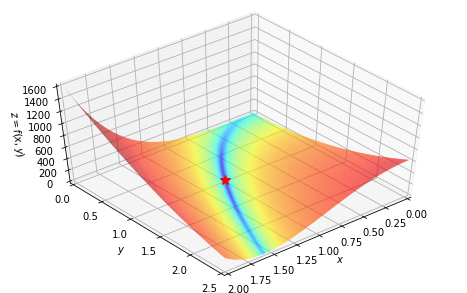

In [57]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z = f(x,y)$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [58]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

/anaconda3/envs/py3.5/lib/python3.5/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


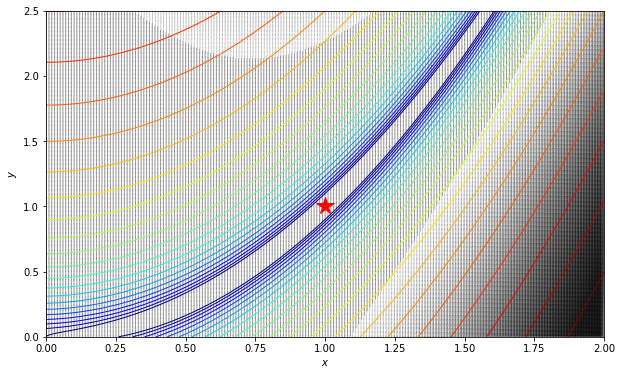

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

# Show Path on Contour Plot

/anaconda3/envs/py3.5/lib/python3.5/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


(0.0, 2.5)

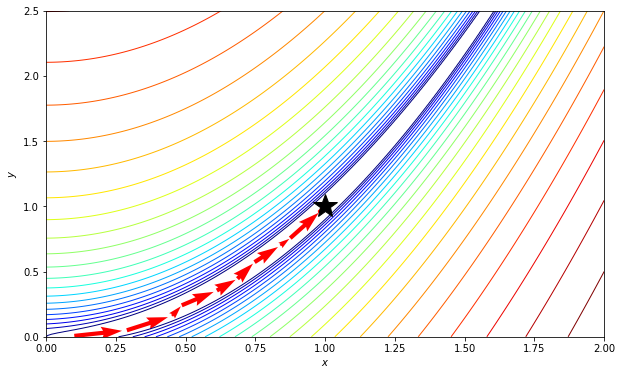

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1.1, color='r')
ax.plot(*minima_, 'k*', markersize=25)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# Show path on 3D plot

(0.0, 2.5)

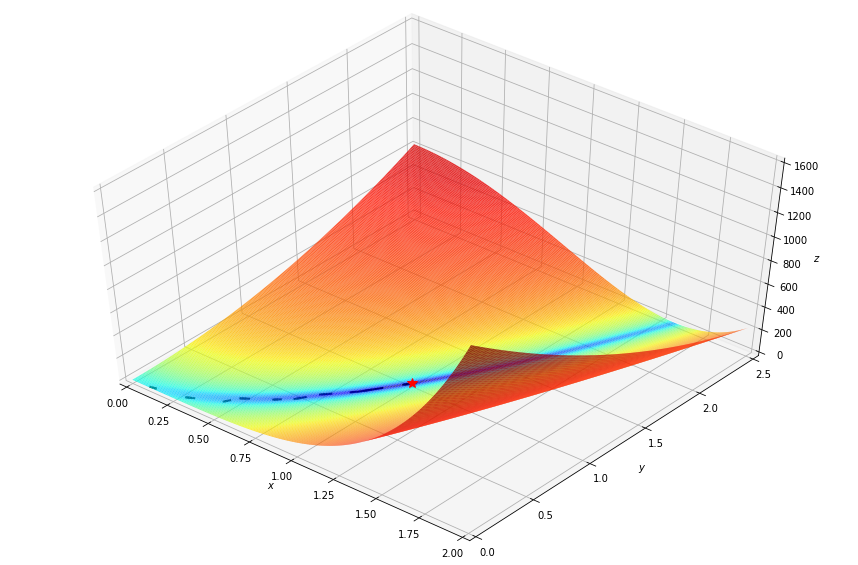

In [61]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['lines.markersize'] = 3

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], f(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], f(*(path[::,1:]-path[::,:-1])), 
          color='k', length = 0.2)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# Video

/anaconda3/envs/py3.5/lib/python3.5/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


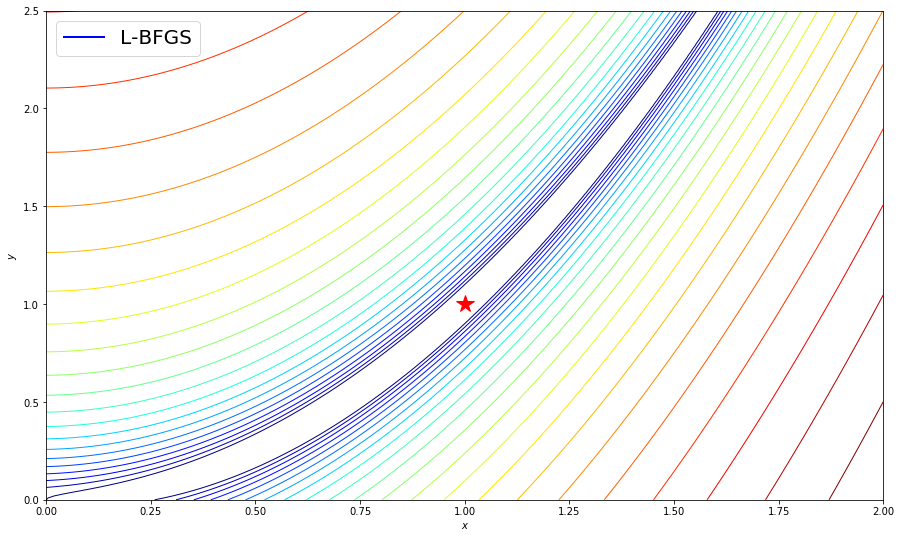

In [68]:
plt.rcParams['lines.linewidth'] = 1
fig, ax = plt.subplots(figsize=(15, 9))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label='L-BFGS', lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left', prop={'size': 20})

In [69]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point


In [70]:
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

In [71]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [72]:
HTML(anim.to_html5_video())

(0.0, 2.5)

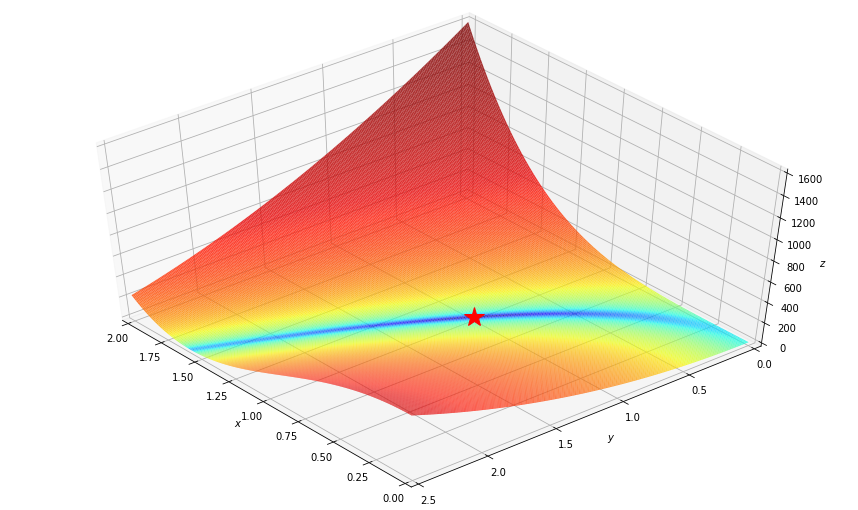

In [78]:
plt.rcParams['lines.linewidth'] = 2.5
fig = plt.figure(figsize=(15, 9))
ax = plt.axes(projection='3d', elev=50, azim=140)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=20)

line, = ax.plot([], [], [], 'b', label='Newton-CG', lw=2)
point, = ax.plot([], [], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

In [79]:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

In [80]:
def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(f(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(f(*path[::,i-1:i]))
    return line, point

In [81]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [82]:
HTML(anim.to_html5_video())